🌟 Exercise 1 : Visualizing the Distribution of CGPA
Objective:
- Create a histogram to visualize the distribution of students’ CGPA.

Dataset Overview: The CGPA of students is categorized into different ranges. This exercise will help us understand the overall academic performance distribution among the students.

Tasks:

- Import necessary libraries.
- Load the dataset into a pandas DataFrame. (For the purpose of this exercise, let’s assume the DataFrame is already loaded and named df).
- Use Seaborn’s histplot to create a histogram of the CGPA categories.
- Customize the histogram with an appropriate color and add a title.
- Display the plot.

In [246]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D2/EXERCISE XP/Student Mental health.csv')
df.columns


Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [247]:
# Cleaning and normalizing data
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [248]:
df.isna().sum() # to check null values

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [249]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean()))


In [251]:
#Renaiming and normalizing:
df = df.rename(columns={'Timestamp': 'Timestamp',
                        'Choose your gender': 'Gender',
                        'What is your age?': 'Age',
                        'What is your course?': 'Course' ,
                        'Your current year of Study': 'Study_Year',
                        'What is your CGPA?': 'CGPA', 
                        'Marital status': 'Marital_Status',
                        'Do you have Depression?': 'Depression', 
                        'Do you have Anxiety?':'Anxiety',
                        'Do you have Panic attack?': 'Panic_Attacks',
                        'Did you seek any specialist for a treatment?': 'Treatment'
})

In [252]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Study_Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attacks',
       'Treatment'],
      dtype='object')

In [253]:
df['CGPA'] = df['CGPA'].apply(lambda x: sum(map(float, x.split(' - '))) / 2)

In [254]:
df['Study_Year'] = pd.to_numeric(df['Study_Year'].str.extract(r'(\d+)')[0])

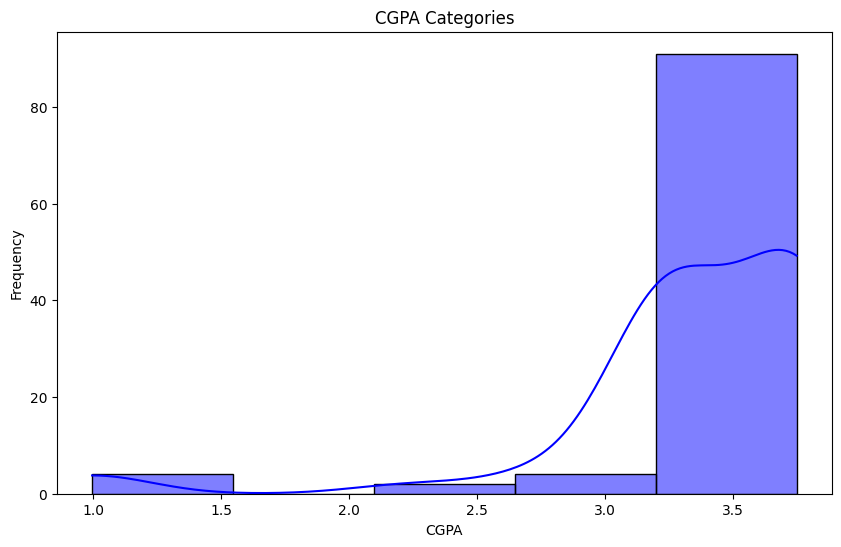

In [255]:
# - Use Seaborn’s histplot to create a histogram of the CGPA categories.
# - Customize the histogram with an appropriate color and add a title.
# - Display the plot.
plt.figure(figsize=(10, 6))
sns.histplot(df, x='CGPA', kde=True, bins=5, color="blue")

# Add labels and title
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.title('CGPA Categories')

# Display the plot
plt.show()

🌟 Exercise 2: Comparing Anxiety Levels Across Different Genders
Objective:
- Use a bar plot to compare the proportion of students experiencing anxiety across different genders.

Dataset Overview: The dataset includes a ‘Do you have Anxiety?’ column with responses and a ‘Choose your gender’ column.

Tasks:

- Import necessary libraries.
- Assuming the dataset is loaded into df, create a bar plot using Seaborn to compare anxiety levels across genders.
- Customize your plot with an appropriate color palette.
- Add a title to your plot.
- Display the plot.


In [256]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Study_Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attacks',
       'Treatment'],
      dtype='object')

In [257]:
df['Anxiety'].value_counts()

Anxiety
No     67
Yes    34
Name: count, dtype: int64

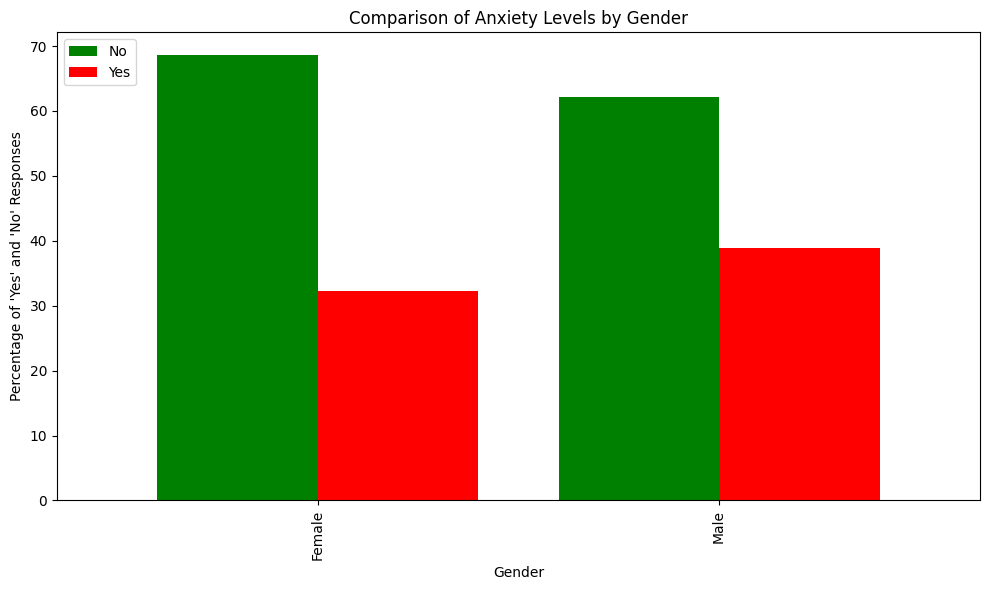

In [258]:

# Count the number of 'Yes' and 'No' responses for each gender
Anxiety_Counts = df.groupby(["Gender", "Anxiety"]).size().unstack(fill_value=0)

# Normalize the counts to scale the data up to 101
Anxiety_Counts = Anxiety_Counts.apply(lambda x: x / x.sum() * 101, axis=1)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust size as needed

# Bar chart for the anxiety counts by gender (side by side)
Anxiety_Counts.plot(kind="bar", ax=ax, color=["green", "red"], width=0.8)

# Add labels and title
ax.set_title("Comparison of Anxiety Levels by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of 'Yes' and 'No' Responses")
ax.legend(["No", "Yes"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

🌟 Exercise 3: Exploring the Relationship Between Age and Panic Attacks
Objective:
- Create a scatter plot to explore if there’s any visible relationship between students’ age and the occurrence of panic attacks.

Dataset Overview: 
- The dataset records students’ ages and their responses to whether they have experienced panic attacks.

Tasks:

- Import necessary libraries.
- Use Seaborn’s scatterplot to create a scatter plot with age on the x-axis and the occurrence of panic - attacks on the y-axis. For simplicity, convert panic attack responses to numeric (e.g., Yes=1, No=0).
- Customize the scatter plot to improve readability.
- Add a title.
- Display the plot.


In [259]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Study_Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attacks',
       'Treatment'],
      dtype='object')

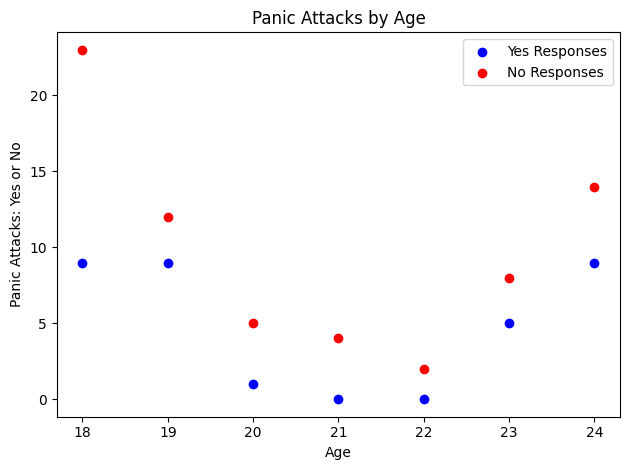

In [260]:

df['Panic_Attacks_numeric'] = df['Panic_Attacks'].map({'Yes': 1, 'No': 0})

# Group by 'Age' and count the 'Yes' and 'No' responses for each age
Panic_Attacks_numeric = df.groupby(['Age', 'Panic_Attacks_numeric']).size().unstack(fill_value=0)

x = Panic_Attacks_numeric.index
y_yes = Panic_Attacks_numeric[1]
y_no = Panic_Attacks_numeric[0] 

# Scatter plot for 'Yes' responses (1) and 'No' responses (0)
plt.scatter(x, y_yes, color='blue', label='Yes Responses')
plt.scatter(x, y_no, color='red', label='No Responses')

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Panic Attacks: Yes or No")
plt.title("Panic Attacks by Age")
plt.legend(loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()


Conclusion: There is no correlation between age and panic attacks in this dataset. 

🌟 Exercise 4: Visualizing Pairwise Relationships with Seaborn Pair Plot
Objective:
- Utilize Seaborn’s pairplot function to visualize the pairwise relationships and distributions across multiple variables in the dataset.

Scenario: 
- You’re interested in understanding the relationships between students’ ages, CGPAs, and their mental health status regarding depression, anxiety, and panic attacks.

Tasks:

- Select a subset of columns relevant to the exercise: Age, CGPA, Depression, Anxiety, and Panic attacks.
- Assume these columns are appropriately coded as numerical values for simplicity.
- Use Seaborn’s pairplot to visualize pairwise relationships and distributions.
- Customize the plot with a hue based on one of the mental health conditions to differentiate the data points.


In [263]:
df['Depression_count'] = df['Depression'].map({'Yes': 1, 'No': 0})
df['Anxiet_count'] = df['Anxiety'].map({'Yes': 1, 'No': 0})

In [264]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Study_Year', 'CGPA',
       'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attacks', 'Treatment',
       'Panic_Attacks_numeric', 'Depression_count', 'Anxiet_count'],
      dtype='object')

In [267]:
df2 = df[[
       #'Timestamp', 'Gender', 
       'Age', 
       #'Course', 'Study_Year', 
       'CGPA',
        #'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attacks', 'Treatment',
       'Panic_Attacks_numeric', 'Depression_count', 'Anxiet_count']].copy()

In [268]:
df2.columns

Index(['Age', 'CGPA', 'Panic_Attacks_numeric', 'Depression_count',
       'Anxiet_count'],
      dtype='object')

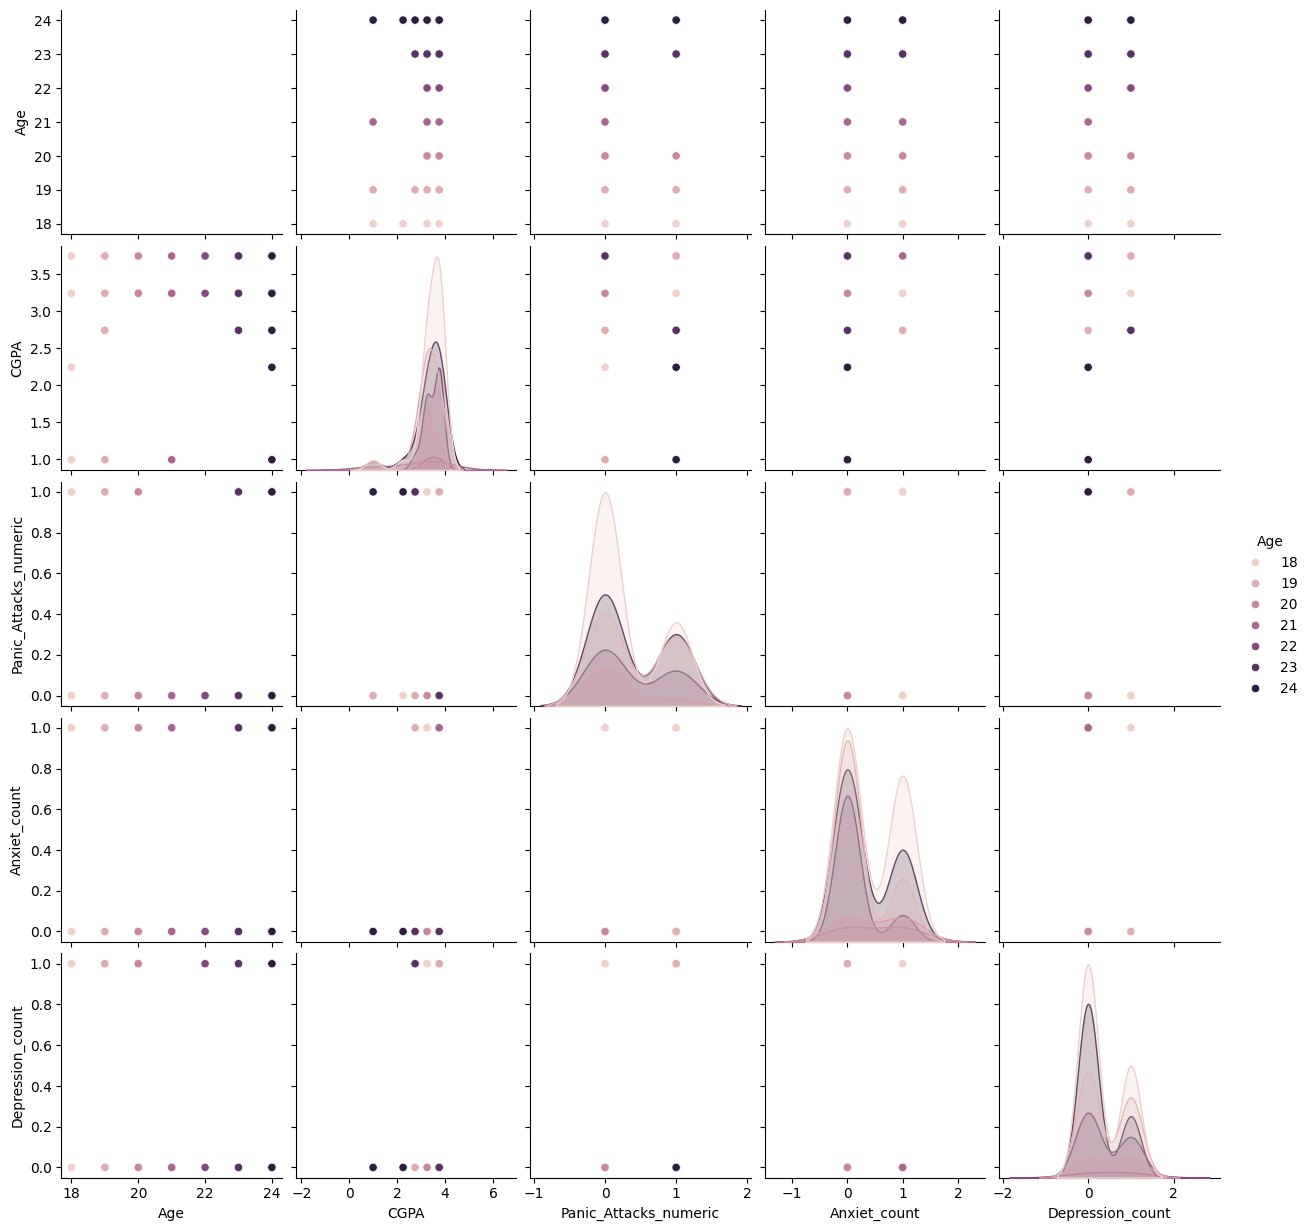

In [273]:
import matplotlib.pyplot as plt
sns.pairplot(df, vars=['Age', 'CGPA', 'Panic_Attacks_numeric', 'Anxiet_count',
       'Depression_count'],
                 hue='Age')
plt.show()

🌟 Exercise 5: Creating a Heatmap to Visualize Correlations
Objective:
- Use Seaborn to create a heatmap that visualizes the correlation matrix of students’ age, CGPA, and mental health status indicators.

Scenario: 
- You aim to identify any potential correlations between students’ age, CGPA, and their self-reported status on depression, anxiety, and panic attacks to find patterns that might need further investigation.

Tasks:

- Calculate the correlation matrix for the selected subset of your dataset.
- Use Seaborn’s heatmap function to visualize the correlation matrix.
- Customize the heatmap for better readability (e.g., annotating the correlation coefficients).

In [274]:
df_corr = df[['CGPA', 'Panic_Attacks_numeric', 'Anxiet_count',
       'Depression_count']].dropna().corr()
df_corr 

,CGPA,Panic_Attacks_numeric,Anxiet_count,Depression_count
CGPA,1.000000,0.042511,0.172950,0.041807
Panic_Attacks_numeric,0.042511,1.000000,0.084478,0.246842
Anxiet_count,0.172950,0.084478,1.000000,0.273764
Depression_count,0.041807,0.246842,0.273764,1.000000


<Axes: >

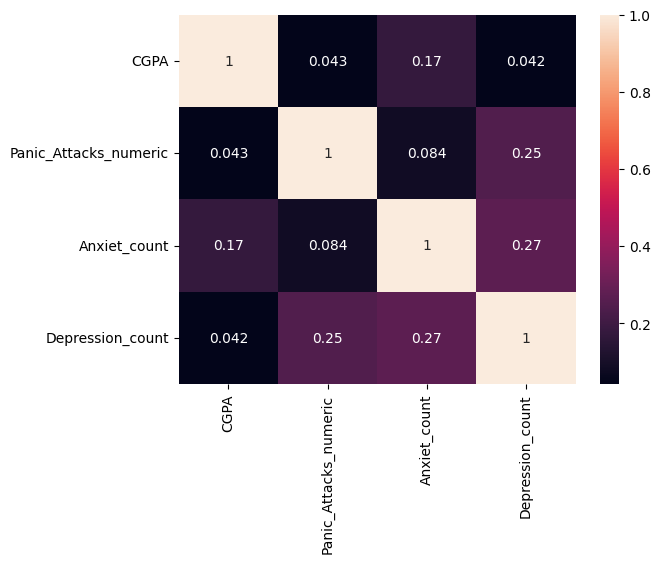

In [275]:
sns.heatmap(df_corr, annot=True)

🌟 Exercise 6: Analyzing Distributions and Relationships Using FacetGrid
Objective:
- Explore the distribution of CGPA across different levels of depression status using Seaborn’s FacetGrid.

Scenario: 
- You are interested in exploring how students’ CGPA distributions vary among those who have reported depression versus those who haven’t.

Tasks:

- Use Seaborn’s FacetGrid to create a grid of histograms for CGPA, segmented by depression status.
- Map a histogram plot to each facet with appropriate customizations.
- Add titles and labels for clarity.

In [276]:
df2.columns

Index(['Age', 'CGPA', 'Panic_Attacks_numeric', 'Depression_count',
       'Anxiet_count'],
      dtype='object')

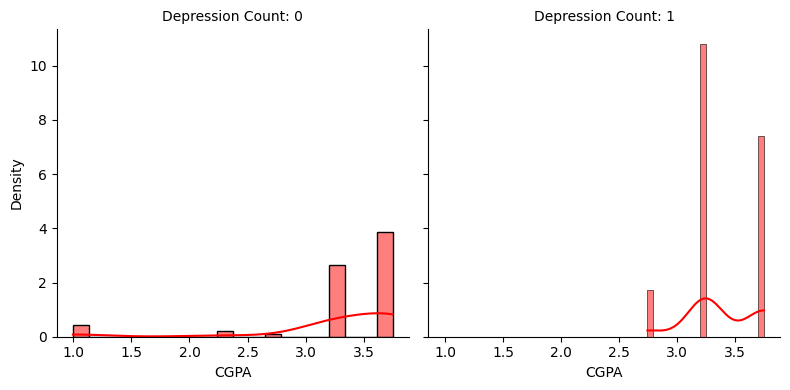

In [278]:

g =sns.FacetGrid(df2, col= 'Depression_count', height=4, aspect=1)
g.map(sns.histplot, 'CGPA', kde=True, bins=20, stat='density', color='red')

g.set_axis_labels('CGPA', 'Density')
g.set_titles('Depression Count: {col_name}')

plt.tight_layout()
plt.show()